In [1]:
##누락된 값(NaN, NULL)은 단순히 무시하면 예상치 못한 결과를 초래. 따라서 누락된 값 처리가 중요하다.

##예제 데이터 만들기
import pandas as pd
from io import StringIO

csv_data = \
    '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
##isnull 메서드는 셀이 수치 값을 가지고 있는지(False), 누락되어있는지(True)를 나타낸 불리언 값이 채워지 DF를 반환.
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
#누락된 데이터 처리 방법 1
#누락된 데이터가 포함된 행(샘플)이나 열(특성)을 완전히 제거하는 방법.
#dropna 메서드 사용
df.dropna(axis=0) #axis가 0이면 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
#axis를 1로 설정하면 NaN이 하나라도 있는 열 삭제 가능
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
#모든 열이 NaN일 때만 행 삭제(해당 예시에는 그런 열이 없으므로 그대로 출력)
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
#실수 값이 표시된 값보다 적은 행을 삭제
df.dropna(thresh=4) #여기선 네 개보다 적은 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
#특정 열에 NaN이 있는 행만 삭제
df.dropna(subset=['C']) #C열만 삭제


,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [8]:
##이렇게 무작정 제거하면 안정된 분석이 불가한 단점 존재.
#또한 분류기가 클래스를 구분하는 데 있어 중요한 정보를 잃을 수도 있다.

In [9]:
###누락된 데이터 처리 방법 2
#보간(interpolation) 기법
##쉽게 말해 대체하는 것이다.
#가장 흔한 보간 기법은 평균으로 대체하는 것

#사이킷런의 Imputer 메서드를 통해 간편하게 평균으로 대체하기
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0) #strategy 값으로 median(중간값), most_frequent(빈도수 최다)로도 변경 가능
imr = imr.fit(df.values) #fit 메서드는 훈련데이터에서 모델 파라미터를 학습
imputed_data = imr.transform(df.values) #transform 메서드에서 학습한 파라미터로 데이터를 변환(변환하려는 데이터 배열 == 데이터 특성 개수)
imputed_data #열마다 계산한 평균 값으로 변경

##훈련세트와 훈련레이블을 fit으로 학습하여 모델 생성 후 테스트 셑를 predict 메서드를 이용해서 예측된 레이블 추출도 가능

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [10]:
#####범주형 데이터 다루기######
##여러가지 데이터 셋이 섞여있는 데이터 다루기

#우선적으롯 순서가 있는 데이터와 없는 것 구분

#예제 데이터셋 만들기
df = pd.DataFrame([
                   ['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df #color은 순서 X, size는 순서가 존재, 수치형 특성(price)

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [11]:
##문자열 값을 정수로 바꿔주어야함
#size 특성의 순서를 올바르게 바꿔주는 함수가 없으므로 자의적으로 매핑 함수 생성
# XL = L + 1 = M + 2
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping) #다시 문자열로 바꾸기 => inv_size_mapping={v: k for k, v in size_mapping.items()}
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
#다시 문자열로 바꾸기
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [13]:
#순서가 없는 클래스 레이블을 정수로 배열(할당한 정수는 아무 의미 없음)
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
#클래스 레이블 정수로 변환
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
#사이킷런의 LabelEncoder로 정수값 부여하기
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [16]:
class_le.inverse_transform(y) #원본으로 돌려놓는 함수 ?????????????(왜 안돼지...??)??????????????

array([0, 1, 0], dtype=int64)

In [17]:
##순서가 없는 color에도 비슷하게 적용
X = df[['color', 'size', 'price']].values 
color_le = LabelEncoder() #1차원 배열을 원함
X[:, 0 ] = color_le.fit_transform(X[:, 0]) #1차원 배열로 만들기 위해 color열만 추출(X[:,0])
X  #blue = 0, green = 1, red = 2

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [18]:
####TIP####
##여러개의 열을 한 번에 정수로 변환
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=np.int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
#첫 매개변수로 transformer의 리스트(이름, 변환기(ord_enc), 변환할 열['color'])
X_trans = col_trans.fit_transform(df) #col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans) 
X_trans

array([[1],
       [2],
       [0]])

In [19]:
#다시 문자열로 전환하기
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans) 

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [20]:
##이대로 분류기에 넣으면 안됨. 학습기가 멋대로 blue(0)가 green(1)보다 작다고 가정하기 때문
##이를 해결하기 위한 것이 ##############원-핫 인코딩(one-hot encoding)##########
#특성에 있는 값마다 더미 특성을 생성
#예시에서는 color의 각 값마다 세 개의 새로운 특성인 blue, green, red 생성
#이진 값으로 특정 샘플의 color를 나타냄
#예를 들어 blue는 blue=1, green=0, red=0

#사이킷런의 OneHotEncoder로 변환 수행
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0]) #categorical_features[x] 변환하려는 열 위치
ohe.fit_transform(X).toarray() #희소 행렬????????? 반환

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [21]:
##원-핫 인코딩으로 더미 변수를 만드는 더 편리한 방법
#판다스의 get_dummies 메서드 이용 => 문자열만 반환하고 나머지는 그대로 둔다.
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [22]:
##다중 공선겅?????????????????

In [23]:
pd.get_dummies(df[['price', 'color', 'size']],
               drop_first=True) #더미의 첫번째 열 삭제
##삭제해도 blue라는 것을 추론할 수 있다.

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [24]:
#OneHotEncoder는 삭제 함수가 없으믈 다음으로 슬라이스해서 삭제 가능
ohe.fit_transform(X).toarray()[:,1:] #첫 열(blue) 삭제

NameError: name 'ohe' is not defined

In [25]:
#####데이터셋을 훈련 세트와 테스트 세트로 나누기#####

##Wine 데이터셋 사용(https://archive.ics.uci.edu/ml/datasets/Wine)
df_wine = pd.read_csv(r'E:\Programming\python\ML\data\wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

클래스 레이블 [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
##사이킷런 모듈의 train_test_split 함수로 랜덤하게 훈련과 테스트 세트 나누기
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3, #30%가 테스트데이타로 들어가고 70%가 트레이닝 데이타로 들어감
                     random_state=0,
                     stratify=y) #훈련과 테스트에 있는 클래스 비율이 원본과 동일하게 유지

In [27]:
##특성 스케일 맞추기##

#방법
#1. 정규화
    #특성 스케일을 [0,1]로 맞춘다
    #최소-최대 스케일 변환의 특별한 경우
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)


In [28]:
#2. 표준화
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [29]:
##유용한 특성 선택##

#모델이 테스트 세트보다 훈련 세트에서 성능이 더 높다면 과대적합
#해결법 
#1. 더 많은 훈련 데이터 모으기  =>  불가능한 경우 다수 존재
#2. 규제를 통해 복잡도 줄이기
#3. 파라미터 개수가 적은 간단한 모델을 선택
#4. 데이터 차원을 줄인다  =>  파라미터가 줄어듬


In [30]:
#규제하기
#L2 규제 => 개별 가중치 값을 제한하여 모델 복잡도를 줄이는 방법
#L1 규제 => 가중치 제곱을 가중치 절대값으로 바꾼것
        # - 희소한 특성 벡터 생성
        # - 대부분 특성 가중치는 0

In [31]:
#L1 규제
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1')
lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1', C=1.0, random_state=42)
lr.fit(X_train_std, y_train)
print('훈련 정확도: ', lr.score(X_train_std, y_train))
print('테스트 정확도: ', lr.score(X_test_std, y_test))

훈련 정확도:  1.0
테스트 정확도:  1.0


In [32]:
lr.intercept_ ##절편 확인(첫 번째 절편은 클래스 1과 2,3 구별/ 두 번째는 2와 1,3 구별/ 세 번째는 3과 1,2 구별)

array([-1.26356604, -1.21599454, -2.37043523])

In [34]:
lr.coef_ #클래스마다 벡터 하나씩 세개의 행이 있는 가중치 배열

array([[ 1.24571379,  0.18047746,  0.74447184, -1.16206611,  0.        ,
         0.        ,  1.16544663,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55203518,  2.50981212],
       [-1.53722618, -0.38723608, -0.99490375,  0.36490375, -0.05976457,
         0.        ,  0.66773248,  0.        ,  0.        , -1.9341522 ,
         1.23402387,  0.        , -2.23179839],
       [ 0.13508255,  0.16979104,  0.35787068,  0.        ,  0.        ,
         0.        , -2.43274437,  0.        ,  0.        ,  1.56234781,
        -0.81813588, -0.49713467,  0.        ]])

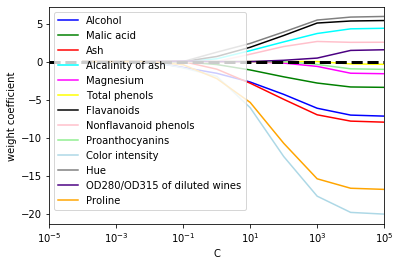

In [35]:
#규제 강도를 달리하여 특성의 가중치 변화를 그래프로 그리기
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color = color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')